In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller
import warnings
import itertools

In [2]:
test_data=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/2. Walmart Store Sales Forecasting/data/test.csv")

In [4]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
train_data=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/2. Walmart Store Sales Forecasting/data/train.csv")

In [6]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
features_data=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/2. Walmart Store Sales Forecasting/data/features.csv")

In [8]:
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
stores_data=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/2. Walmart Store Sales Forecasting/data/stores.csv")

In [19]:
train_data['Date']=pd.to_datetime(train_data['Date'])
test_data['Date']=pd.to_datetime(test_data['Date'])

In [21]:
# Data Exploratory for train data
train_data['Month']=train_data['Date'].dt.month
train_data['Year']=train_data['Date'].dt.year
train_data['Dayofweek']=train_data['Date'].dt.dayofweek

In [22]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
0,1,1,2010-02-05,24924.50,False,2,2010,4
1,1,1,2010-02-12,46039.49,True,2,2010,4
2,1,1,2010-02-19,41595.55,False,2,2010,4
3,1,1,2010-02-26,19403.54,False,2,2010,4
4,1,1,2010-03-05,21827.90,False,3,2010,4


In [35]:
train_data.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Month           0
Year            0
Dayofweek       0
dtype: int64

In [23]:
# data Exploratory for test data
test_data['Month']=test_data['Date'].dt.month
test_data['Year']=test_data['Date'].dt.year
test_data['Dayofweek']=test_data['Date'].dt.dayofweek

In [25]:
test_data.head()

,Store,Dept,Date,IsHoliday,Month,Year,Dayofweek
0,1,1,2012-11-02,False,11,2012,4
1,1,1,2012-11-09,False,11,2012,4
2,1,1,2012-11-16,False,11,2012,4
3,1,1,2012-11-23,True,11,2012,4
4,1,1,2012-11-30,False,11,2012,4


In [36]:
test_data.isnull().sum()

Store        0
Dept         0
IsHoliday    0
Month        0
Year         0
Dayofweek    0
dtype: int64

In [27]:
# set the dates as the index of the dataframe, for time-series analysis
train_data.set_index('Date',inplace=True)
test_data.set_index('Date',inplace=True)

In [29]:
train_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
Date,,,,,,,
2010-02-05,1,1,24924.50,False,2,2010,4
2010-02-12,1,1,46039.49,True,2,2010,4
2010-02-19,1,1,41595.55,False,2,2010,4
2010-02-26,1,1,19403.54,False,2,2010,4
2010-03-05,1,1,21827.90,False,3,2010,4


In [30]:
test_data.head()

,Store,Dept,IsHoliday,Month,Year,Dayofweek
Date,,,,,,
2012-11-02,1,1,False,11,2012,4
2012-11-09,1,1,False,11,2012,4
2012-11-16,1,1,False,11,2012,4
2012-11-23,1,1,True,11,2012,4
2012-11-30,1,1,False,11,2012,4


In [31]:
# extracting the weekly sale
sales=train_data.groupby('Date')['Weekly_Sales'].sum()
sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

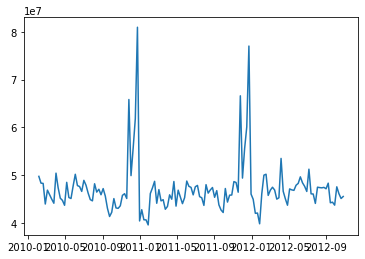

In [34]:
plt.plot(sales) 

In [37]:
sales_mean=sales.rolling(window=12).mean().round(4)
sales_std=sales.rolling(window=12).std().round(4)
print(sales_mean,sales_std)

Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    4.614606e+07
2012-10-05    4.626830e+07
2012-10-12    4.627405e+07
2012-10-19    4.635949e+07
2012-10-26    4.619767e+07
Name: Weekly_Sales, Length: 143, dtype: float64 Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    1.630511e+06
2012-10-05    1.680931e+06
2012-10-12    1.680270e+06
2012-10-19    1.582753e+06
2012-10-26    1.556161e+06
Name: Weekly_Sales, Length: 143, dtype: float64


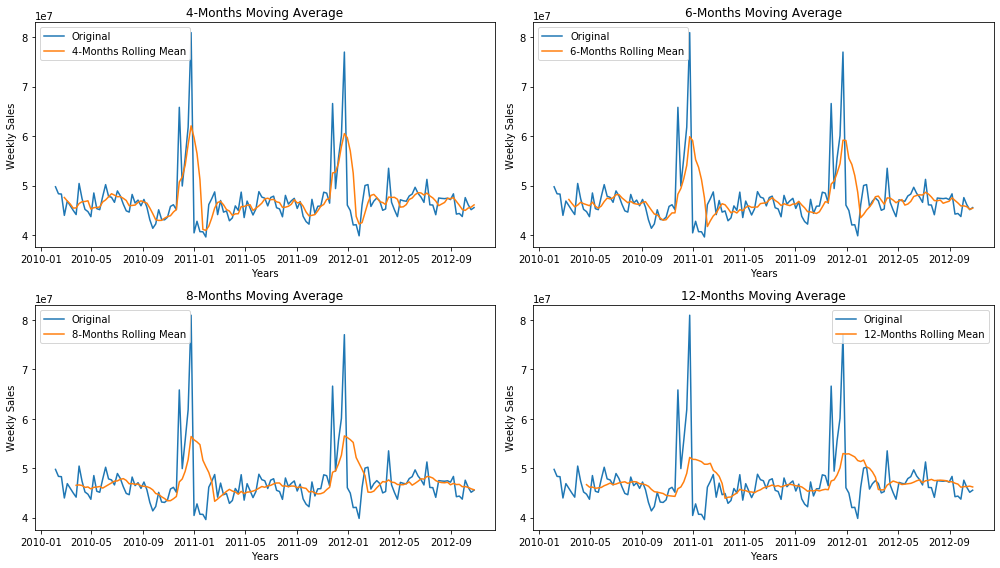

In [39]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales.index, sales, label='Original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='Original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='Original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='Original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

#### Seasonality – Time Series Decomposition

In [41]:
monthly_sales = pd.pivot_table(train_data, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales = monthly_sales.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

Year,2010,2011,2012
Month,,,
1,NaN,13997.773991,14252.698030
2,16076.778701,15870.141203,16077.647710
3,15432.626612,15182.972005,15589.875454
4,15745.551340,15361.895495,15890.394983
5,15996.481695,15367.864481,15967.389566
6,16486.250953,16188.124643,16309.247563
7,15972.812718,15724.738313,15893.325343
8,16171.689295,16030.542478,16002.348874
9,15120.086691,14961.570247,15239.205709


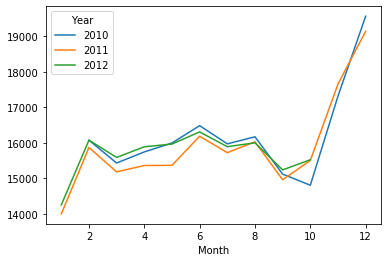

In [42]:
monthly_sales.plot()

#### Irregular Remainder – Time Series Decomposition

In [45]:
decomposition = sm.tsa.seasonal_decompose(sales, extrapolate_trend=8)

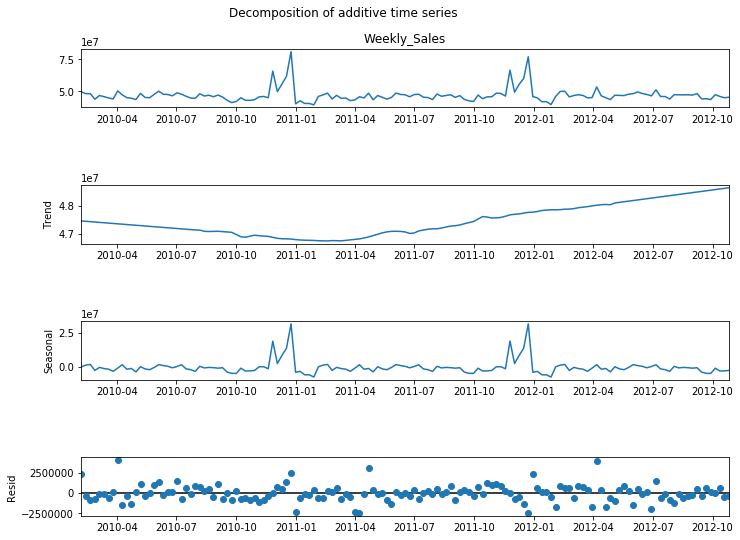

In [46]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [47]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [54]:
decomp_output['TSI'] = decomp_output.trend*decomp_output.seasonal*decomp_output.resid
decomp_output

,Weekly_Sales,trend,seasonal,resid,TSI
Date,,,,,
2010-02-05,49750740.50,4.746247e+07,2.717348e+02,2.288001e+06,2.950882e+16
2010-02-12,48336677.63,4.744942e+07,1.234856e+06,-3.475975e+05,-2.036685e+19
2010-02-19,48276993.78,4.743637e+07,1.737900e+06,-8.972774e+05,-7.397127e+19
2010-02-26,43968571.13,4.742332e+07,-2.705045e+06,-7.497064e+05,9.617400e+19
2010-03-05,46871470.30,4.741027e+07,-4.231219e+05,-1.156816e+05,2.320610e+18
...,...,...,...,...,...
2012-09-28,43734899.40,4.857360e+07,-4.910067e+06,7.136779e+04,-1.702119e+19
2012-10-05,47566639.31,4.859558e+07,-1.016989e+06,-1.195188e+04,5.906763e+17
2012-10-12,46128514.25,4.861756e+07,-3.124785e+06,6.357362e+05,-9.658067e+19


#### Asumption Check..( Whether Series Stationary or not)
#### Stationary Data for ARIMA models

In [59]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way less than the critical values.

As we observed while plotting the moving average over months that there is a monthly pattern, now, let’s decipher the seasonal component.



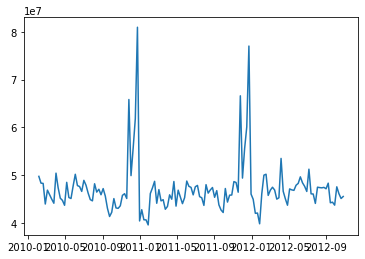

In [60]:
plt.plot(sales)

mean and varience are not constant. to reduce the varience constant, we have to apply log transformation.

Method-1 Log Transformation


In [61]:
sales_log = np.log10(sales)

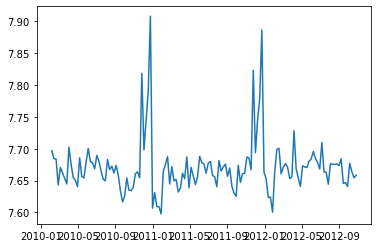

In [62]:
plt.plot(sales_log)

Again we have to check on the sales_log.

In [63]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


still series is not-stationary. (First Method Failed)

Method-2 Difference of Series

In [64]:
sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

In [65]:
sales.diff(1).head()

Date
2010-02-05           NaN
2010-02-12   -1414062.87
2010-02-19     -59683.85
2010-02-26   -4308422.65
2010-03-05    2902899.17
Name: Weekly_Sales, dtype: float64

In [67]:
sales_diff1 = sales.diff(1)
sales_diff1.dropna(inplace=True)

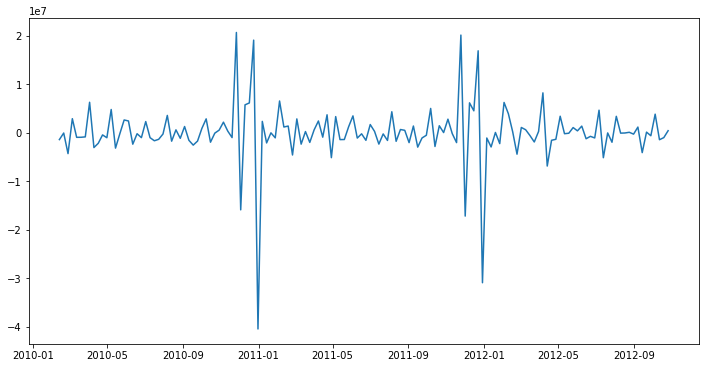

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(sales_diff1)

In [69]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.699469e+00
p-value                        3.922579e-09
#lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [70]:
sales_log_diff1 = sales_log.diff(1)
sales_log_diff1.dropna(inplace=True)

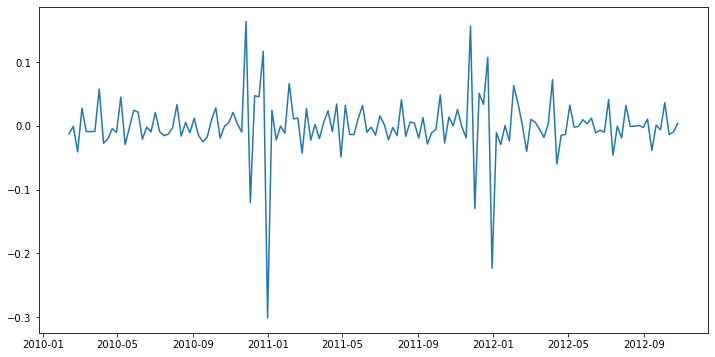

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(sales_log_diff1)

Again taking difference Series

In [72]:
sales_log_diff2 = sales_log.diff(2)
sales_log_diff2.dropna(inplace=True)

In [73]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.558182e+00
p-value                        3.059679e-11
#lags Used                     4.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


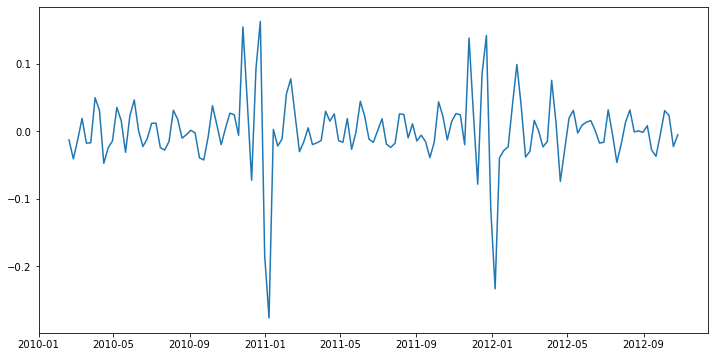

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(sales_log_diff2)

To calculate p & q value , we have to build ACF & PACF sample

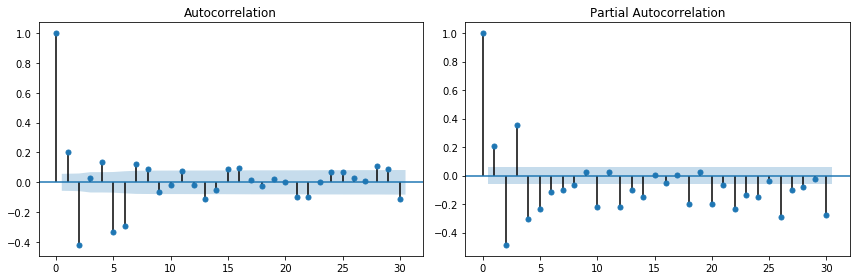

In [131]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff2, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

Identification of best fit ARIMA model

ACF (Auto Correlation)-

Model is possible

Not Showing Non-Stationary

Series showing seasonality of 12 months beacause of pettern in the ACF graph, So the best fit model will "SARIMA"(Seasonal ARIMA).

In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q).

1- "sales_log_diff2" is final series which is Not-Stationary (take log of series and 2 time difference). So value of d will be---2 d=2.

2- In PACF graph - After 1 leg value crossing 0, so that p=1.

3- In ACF graph - After 1 leg values becomig 0, so that q=1.

Final Values- p=1, d=2, q=1.


In [144]:
model = sm.tsa.statespace.SARIMAX(sales_log, order = (1,2,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

C:\Users\gaura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\Users\gaura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [145]:
results = model.fit()

C:\Users\gaura\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [146]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 2, 1)x(1, 0, [], 12)   Log Likelihood                 201.617
Date:                             Fri, 28 Aug 2020   AIC                           -395.234
Time:                                     23:50:44   BIC                           -383.825
Sample:                                 02-05-2010   HQIC                          -390.598
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2290      0.133     -1.728      0.084      -0.489       0.031
ma.L1         -0.8471      

In this model AIC (Akaike Information Criterion)> BIC (Bayesian Information Criterion)

For best model, AIC should be less than BIC, "AIC<BIC"


Iterate the process to find the best values for p, d, q and P, D, Q

In [140]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [147]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [148]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [149]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [152]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-492.971404315493


#### Predict sales on in-sample date using the best fit ARIMA model

In [153]:
best_model = sm.tsa.statespace.SARIMAX(sales_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [154]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 249.486
Date:                Sat, 29 Aug 2020   AIC                           -492.971
Time:                        00:01:42   BIC                           -484.146
Sample:                    02-05-2010   HQIC                          -489.385
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3754      0.048      7.743      0.000       0.280       0.470
ma.L1         -1.0000     56.849     -0.018      0.986    -112.423     110.423
sigma2         0.0016      0.091      0.018      0.9

In [155]:
sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [156]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-09-14'), full_results=True)

In [157]:
pred_dynamic.predicted_mean

2012-09-14    7.676189
2012-09-21    7.661498
2012-09-28    7.661864
2012-10-05    7.659418
2012-10-12    7.673239
2012-10-19    7.668168
2012-10-26    7.664475
Freq: W-FRI, dtype: float64

In [158]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [159]:
actual = sales['2012-09-14':]
actual

Date
2012-09-14    44226038.65
2012-09-21    44354547.11
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, dtype: float64

In [160]:
#Mean absolute percentage error
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [161]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0378


In [162]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 3507665915974.3096
The ROOT Mean Squared Error of our forecasts is 1872876.374984294


In [163]:
np.power(10, best_results.forecast(steps=12))

2012-11-02    4.633924e+07
2012-11-09    4.664130e+07
2012-11-16    4.675519e+07
2012-11-23    4.679802e+07
2012-11-30    4.681411e+07
2012-12-07    4.682015e+07
2012-12-14    4.682242e+07
2012-12-21    4.682327e+07
2012-12-28    4.682359e+07
2013-01-04    4.682371e+07
2013-01-11    4.682375e+07
2013-01-18    4.682377e+07
Freq: W-FRI, dtype: float64

Forecast sales using the best fit ARIMA model

In [165]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [166]:
pred_ci_99.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587072,7.744826
2012-11-09,7.584325,7.753216
2012-11-16,7.584557,7.755102
2012-11-23,7.584812,7.755643
2012-11-30,7.584931,7.755822


In [167]:
pred_ci_95.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587072,7.744826
2012-11-09,7.584325,7.753216
2012-11-16,7.584557,7.755102
2012-11-23,7.584812,7.755643
2012-11-30,7.584931,7.755822


In [168]:
n_steps = 36
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [169]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2012-11-01,4.633924e+07,3.864310e+07,5.556814e+07
2012-12-01,4.664130e+07,3.839949e+07,5.665206e+07
2013-01-01,4.675519e+07,3.842000e+07,5.689870e+07
2013-02-01,4.679802e+07,3.844254e+07,5.696956e+07
2013-03-01,4.681411e+07,3.845308e+07,5.699311e+07


In [170]:
fc_99.head()

,lower_ci_99,upper_ci_99
2012-11-01,3.864310e+07,5.556814e+07
2012-12-01,3.839949e+07,5.665206e+07
2013-01-01,3.842000e+07,5.689870e+07
2013-02-01,3.844254e+07,5.696956e+07
2013-03-01,3.845308e+07,5.699311e+07


In [171]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,4.633924e+07,3.864310e+07,5.556814e+07,3.864310e+07,5.556814e+07
2012-12-01,4.664130e+07,3.839949e+07,5.665206e+07,3.839949e+07,5.665206e+07
2013-01-01,4.675519e+07,3.842000e+07,5.689870e+07,3.842000e+07,5.689870e+07
2013-02-01,4.679802e+07,3.844254e+07,5.696956e+07,3.844254e+07,5.696956e+07
2013-03-01,4.681411e+07,3.845308e+07,5.699311e+07,3.845308e+07,5.699311e+07


In [173]:
pd.plotting.register_matplotlib_converters()

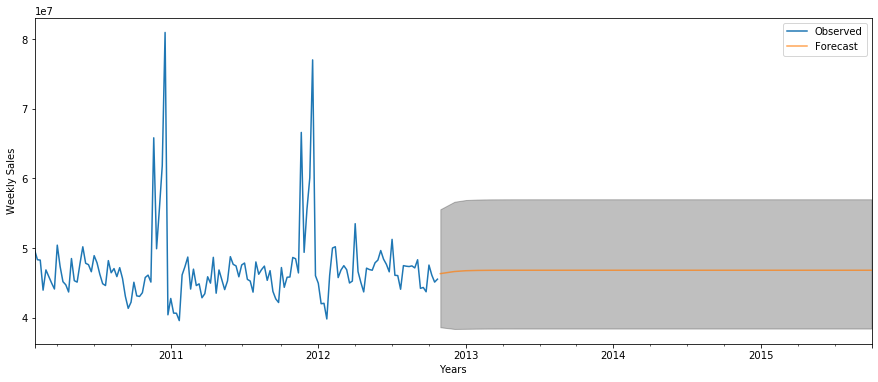

In [174]:
# plot the forecast along with the confidence band
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

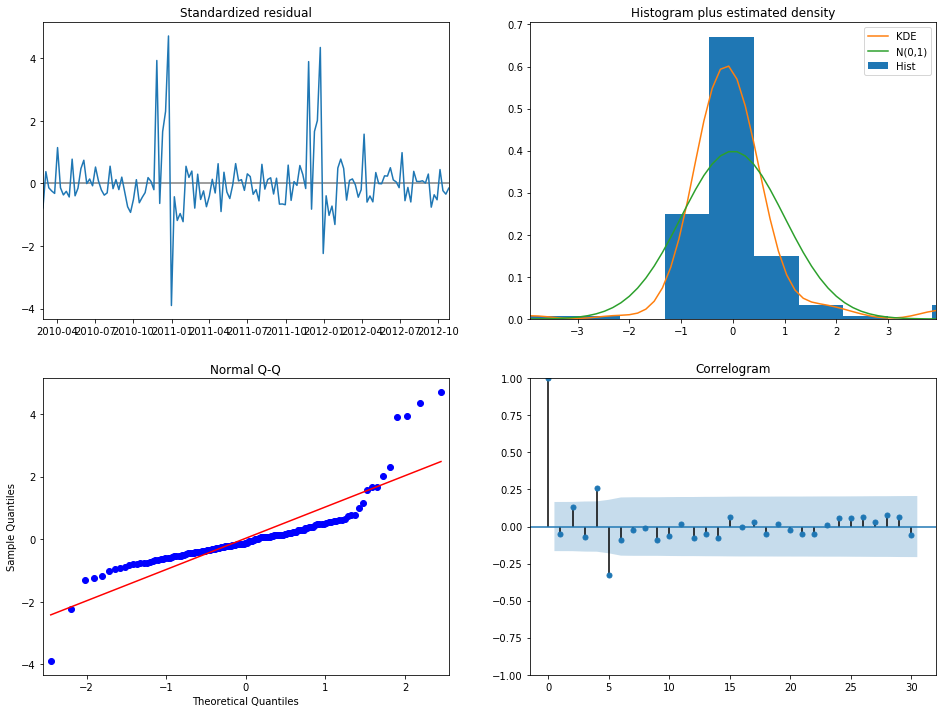

In [175]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()